# Ejercicio de laboratorio 1: Kmeans
Entrega del dia 10 de octubre de 2024
### Equipo
- **Hernández Jiménez Erick Yael**
- **Patiño Vázquez Samuel**
- **Robert Garayzar Arthur**

## Primera parte

In [ ]:
!pip install ydata_profiling #Linea para descargar la biblioteca en G.Colab

In [2]:
%matplotlib inline
#Se agrega para el entorno de Visual Basic en caso de ser ejecutado en este IDE o en caso de que la gráfica de Matplot no se renderice adecuadamente
from sklearn.decomposition import PCA   #Se agrega para reducir las dimensiones de los datos
from sklearn.cluster import KMeans  #Se agrefa para aplicar el método de K-means
from ydata_profiling import ProfileReport #Se agrega para generar el perfilado de datos en el reporte HTML
import matplotlib.pyplot as plt #Se agrega para graficar los resultados del algoritmo
import pandas as pd #Se agrega para la manipulación de datos del set

In [3]:
ruta_dataset = "Datasets/bezdekIris.csv"  #Ruta del que se lee el archivo csv
ruta_reporte = "DataProfilingIris.html"   #Ruta y nombre con el que se creará el reporte de perfilado de datos
ruta_grafica = "ScatterGraphic.png"   #Ruta y nombre con el que se descargará la imagen de la gráfica de dispersión en caso de que no pueda ser posible mostrar la gráfica

In [ ]:
dataset = pd.read_csv(ruta_dataset, sep=',')    #Se lee y especifíca el tipo de separador con el que se dividen los datos en el set
reporte = ProfileReport(dataset, title="Data profiling de Iris")    #Se crea el reporte con el título en el atributo _title_
reporte.to_file(ruta_reporte)   #Se exporta el archivo

## Segunda parte

In [ ]:
features = dataset.columns[:-1] #Se seleccionan las columnas a usar excepto la de 'Class' ya que solo queremos los datos numéricos
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)   #Se crea e inicializa el algoritmo K-means
kmeans.fit(dataset[features])   #Se entrena el algoritmo con los datos del dataset
dataset['cluster'] = kmeans.labels_ #Se añaden las etiquetas de los cluster al dataset

In [10]:
grouped = dataset.groupby(['Class', 'cluster']).agg({'Sepal length': 'count'})  #Se agrupan los datos con base en los atributos Class y cluster
print(grouped)

                         Sepal length
Class           cluster              
Iris-setosa     1                  50
Iris-versicolor 0                  48
                2                   2
Iris-virginica  0                  14
                2                  36


In [7]:
pca = PCA(n_components=2)   #Se indica la dimensionalidad al que se reducirán los datos, en este caso: 2
pca_res = pca.fit_transform(dataset[features])  #Se reduce la dimensión del espacio numérico de los datos
dataset['X'] = pca_res[:, 0]    #Se agrega la columna 'X' al dataser con los componentes x de la reducción
dataset['Y'] = pca_res[:, 1]    #Se agrega la columna 'Y' al dataser con los componentes y de la reducción

In [8]:
#Se definen los cluster
cluster_0 = dataset[dataset['cluster'] == 0]
cluster_1 = dataset[dataset['cluster'] == 1]
cluster_2 = dataset[dataset['cluster'] == 2]

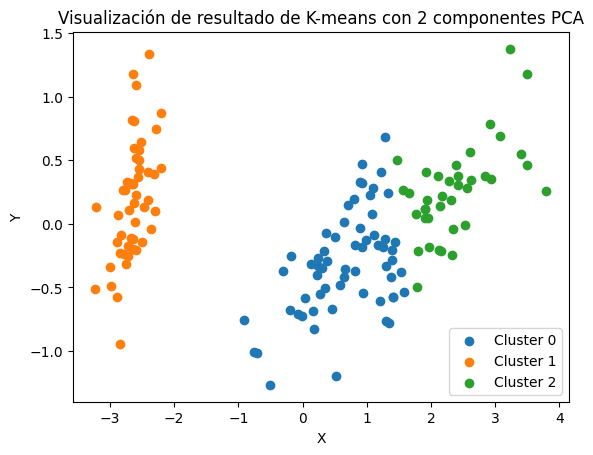

In [9]:
#Se imprime la gráfica
plt.scatter(cluster_0['X'], cluster_0['Y'], label='Cluster 0')
plt.scatter(cluster_1['X'], cluster_1['Y'], label='Cluster 1')
plt.scatter(cluster_2['X'], cluster_2['Y'], label='Cluster 2')
plt.legend()
plt.title('Visualización de resultado de K-means con 2 componentes PCA')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()